## FaceNet single-predictor models
Set of models investigating face perception:
- single-predictor model with binary regressor coding for presence of any face (**any_faces**)
- **any_faces** + regressor coding for first appearance face for the first time (**first_time_face**)
- **any_faces** + log of time since last appearance of detected face (mean across faces if more than one are present in the frame, **log_mean_time_since**) 
- **any_faces** + log of time since last appearance of detected face (max across multiple faces, **log_max_time_since**) 
- **any_faces** + log of cumulative time the detected face has been on screen (mean across faces, **log_mean_face_time_cum**)
- **any_faces** + log of cumulative time the detected face has been on screen (max across faces, **log_max_face_time_cum**)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.create import create_set_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor, plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [3]:
api = Neuroscout()

## Define predictors and confounds

In [4]:
predictors = [['any_faces']]
other = ['first_time_face', 'log_mean_time_since', 'log_max_time_since', 'log_mean_face_time_cum', 'log_max_face_time_cum']
for p in other:
    predictors.append(['any_faces', p])

In [5]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create models

In [7]:
mdict = {}
for pset in predictors:
    mdict['+'.join(pset)] = create_set_models(pset, confounds, name='+'.join(pset))

In [8]:
filename = Path('models') / 'facenet.json'

In [15]:
dump_collection(mdict, filename)

In [16]:
mdict = load_collection(filename)

## Generate reports

In [18]:
for (pred, dataset, task), model in flatten_collection(mdict):
    model.generate_report(run_id=model.runs[0])

In [ ]:
for pset in predictors:
    mdict['+'.join(pset)]['SherlockMerlin']['SherlockMovie'].plot_report()

## Inspect regressors

In [8]:
df = _extract_regressors(mdict)

/home/roberta/notebooks/repos/neuroscout-reports/tools/viz.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ds_task'] = df['dataset'] + '_' + df['task']


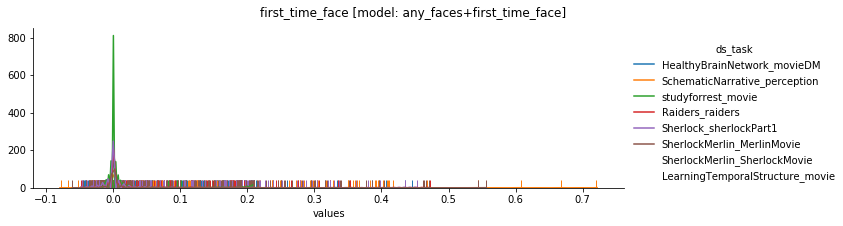

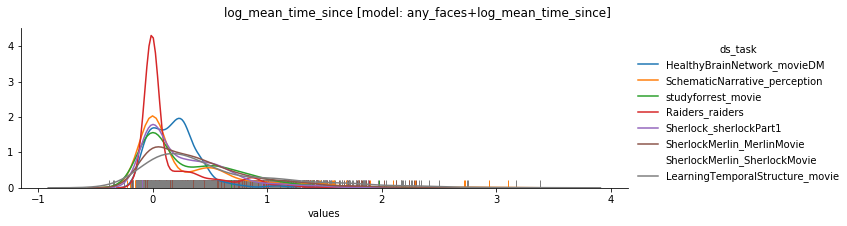

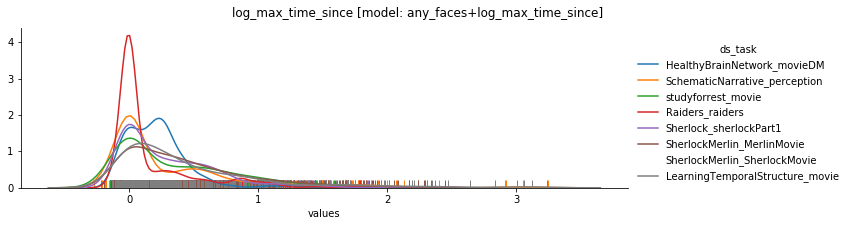

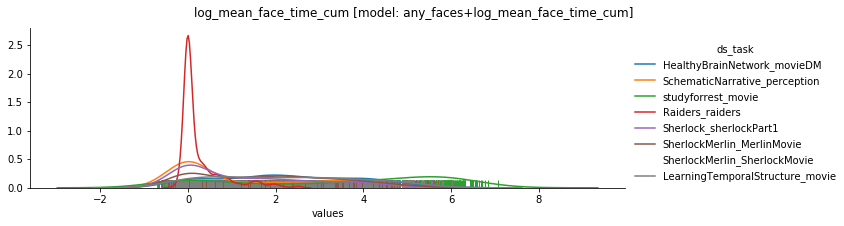

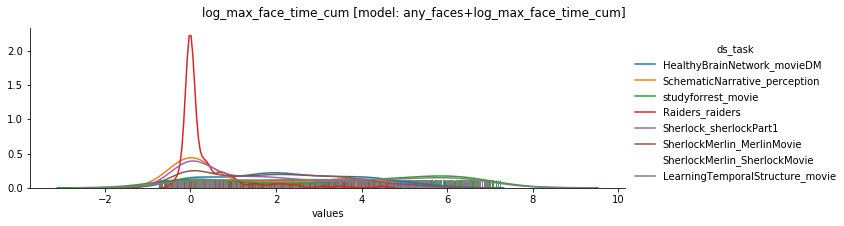

In [9]:
plot_regressor('distribution', df=df, predictors=other,
               split_by='hue', color=None, aspect=3, hist=None, rug=True)

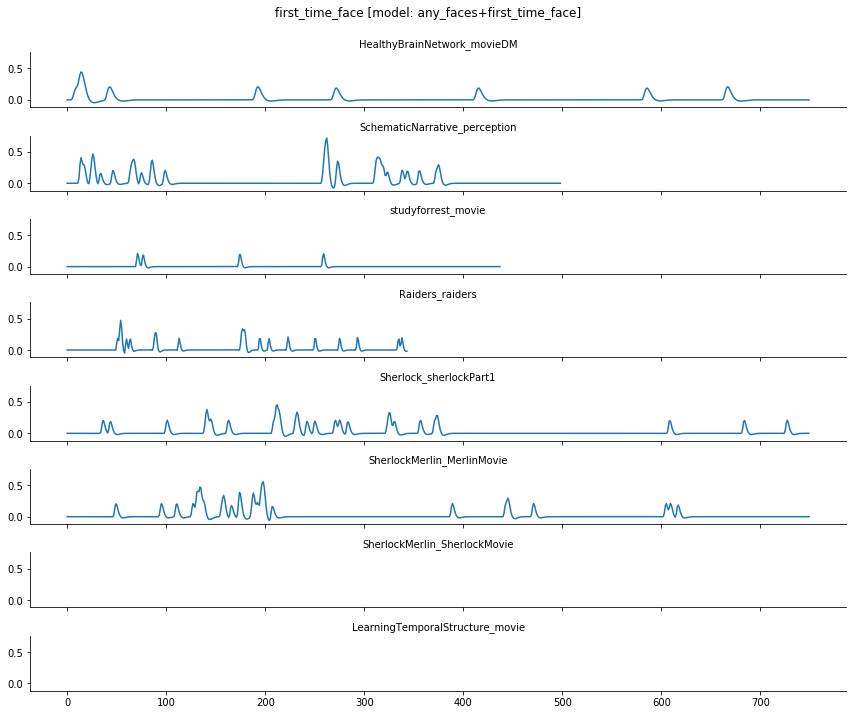

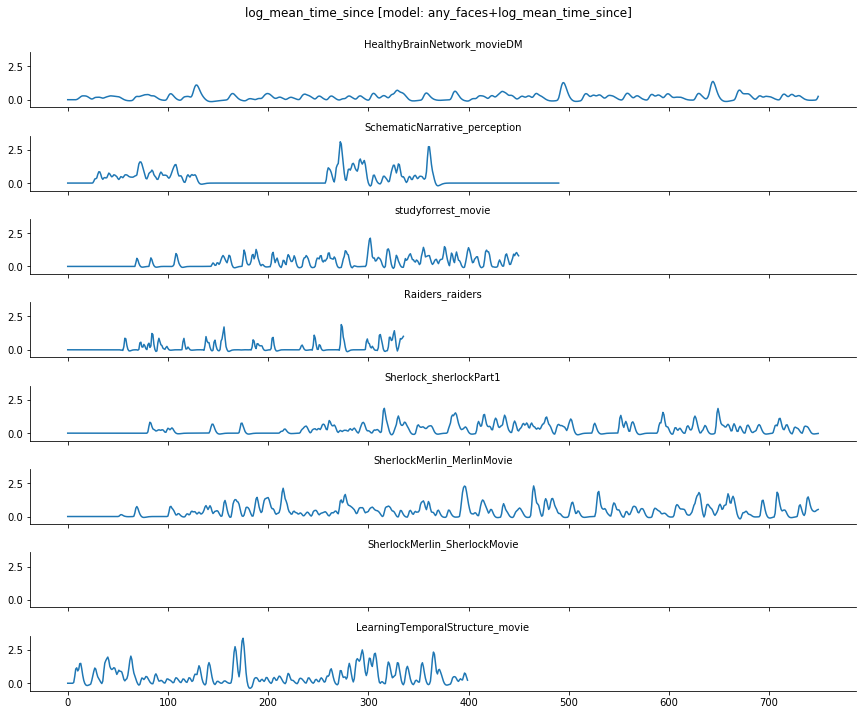

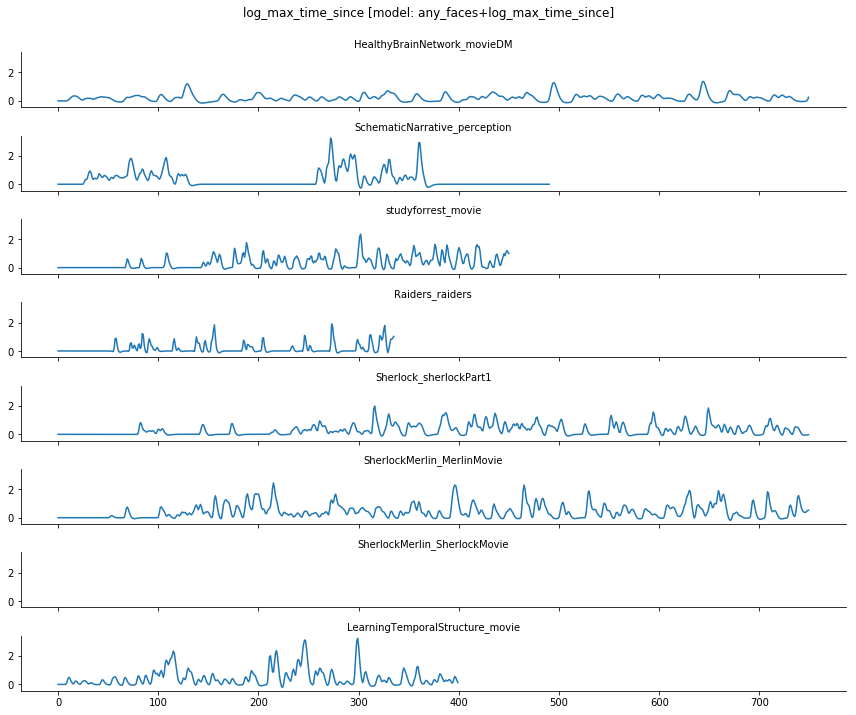

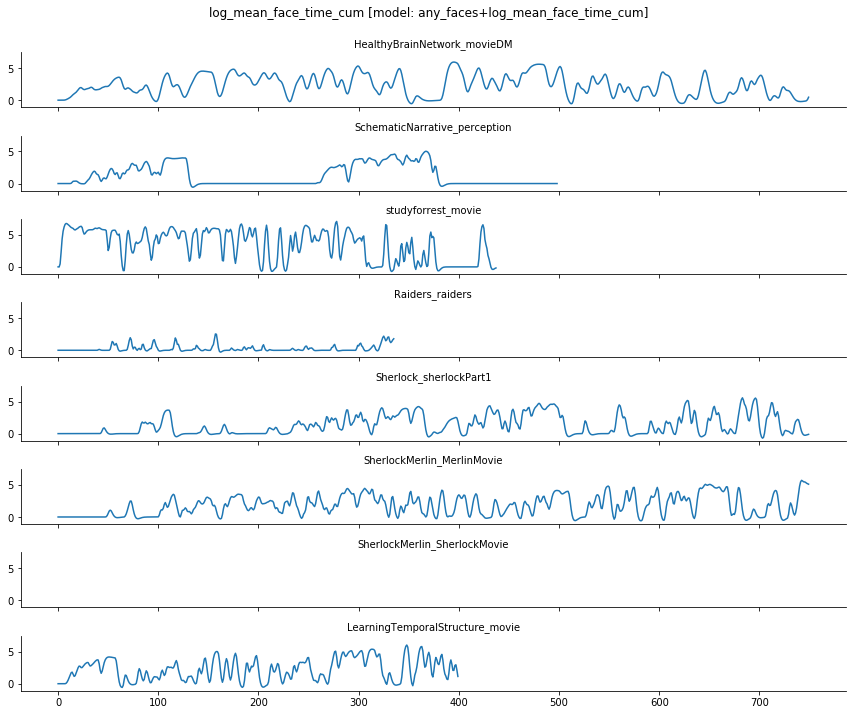

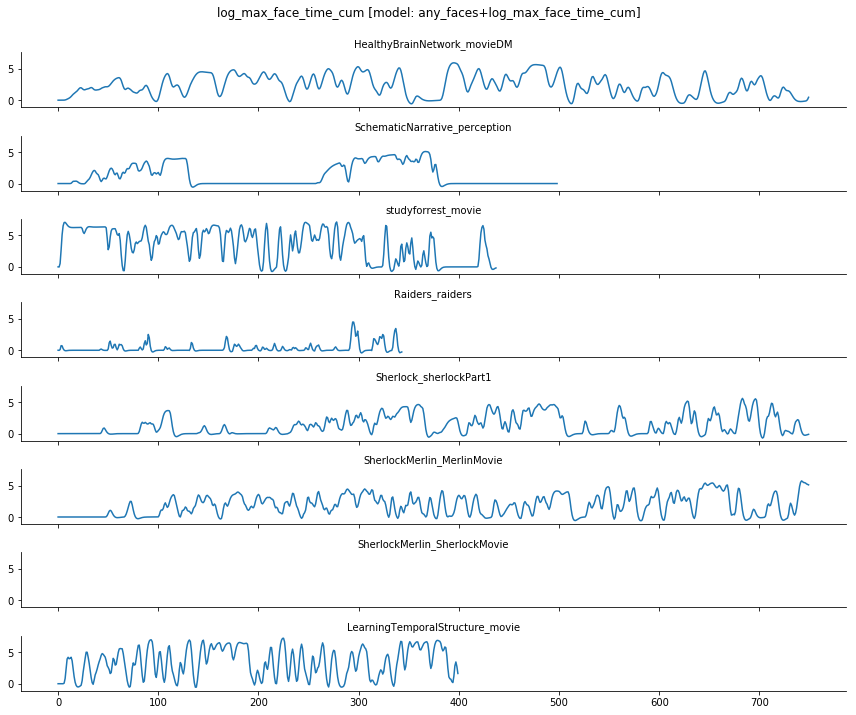

In [10]:
plot_regressor('timeseries', df=df, predictors=other,
               split_by='row', height=1.2, aspect=10)

In [11]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

/home/roberta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


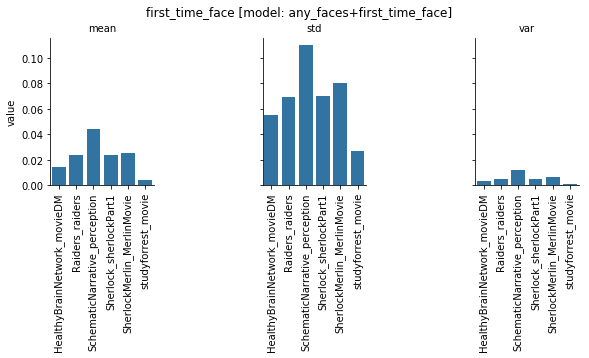

/home/roberta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


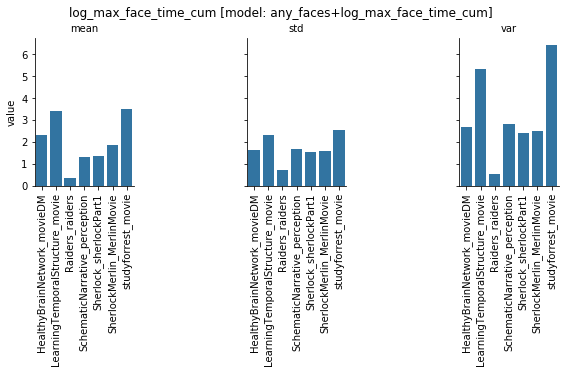

/home/roberta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


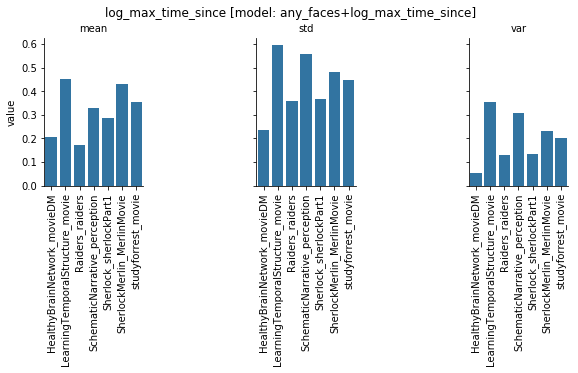

/home/roberta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


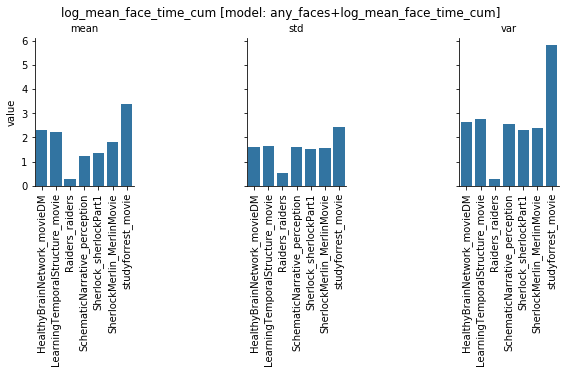

/home/roberta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


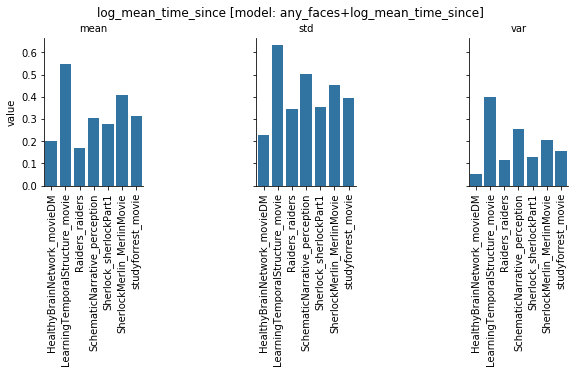

In [12]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'], 
             predictors=other,
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [22]:
for (pred, dataset, task), model in flatten_collection(mdict):
    if model.get_status()['status'] in 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{dataset}, {model.status}, {model.hash_id}')

HealthyBrainNetwork, PASSED
LearningTemporalStructure, PASSED
Raiders, PASSED
SchematicNarrative, PASSED
Sherlock, PASSED
SherlockMerlin, PASSED
SherlockMerlin, PASSED
studyforrest, PASSED
HealthyBrainNetwork, PASSED
LearningTemporalStructure, PASSED
Raiders, PASSED
SchematicNarrative, PASSED
Sherlock, PASSED
SherlockMerlin, PASSED
SherlockMerlin, PASSED
studyforrest, PASSED
HealthyBrainNetwork, PASSED
LearningTemporalStructure, PASSED
Raiders, PASSED
SchematicNarrative, PASSED
Sherlock, PASSED
SherlockMerlin, PASSED
SherlockMerlin, PASSED
studyforrest, PASSED
HealthyBrainNetwork, PASSED
LearningTemporalStructure, PASSED
Raiders, PASSED
SchematicNarrative, PASSED
Sherlock, PASSED
SherlockMerlin, PASSED
SherlockMerlin, PASSED
studyforrest, PASSED
HealthyBrainNetwork, PASSED
LearningTemporalStructure, PASSED
Raiders, PASSED
SchematicNarrative, PASSED
Sherlock, PASSED
SherlockMerlin, PASSED
SherlockMerlin, PASSED
studyforrest, PASSED
HealthyBrainNetwork, PASSED
LearningTemporalStructure, 

In [20]:
' '.join([m.hash_id for _, m in flatten_collection(mdict)])

'wWyvQ 97p0Q AqQD3 9EdJr Ma4vb wjN6m 9L2KK MGvYD wkVlD Mv3rR MNQr0 M4jBy M55Dn 9eyvb AZ4vW A253P 9BqXp MzQ5z w0glP MD1LO wK2LW Aop40 Arqax wQDL1 AxBd1 w0glv AYyvP wJ3Qe 9Bq6N MD1xD wQDLW M37YR wK2L2 AYy6O wl8Xv Aop4B AxBRW wJ3Lv M373p A6oD7 Mm3PX wl8xW MRaVb MpDBj wgyv0 MPqdL A6oQk wy28W'

## Results

In [8]:
flat_models = flatten_collection(mdict)

No image for SherlockMerlin


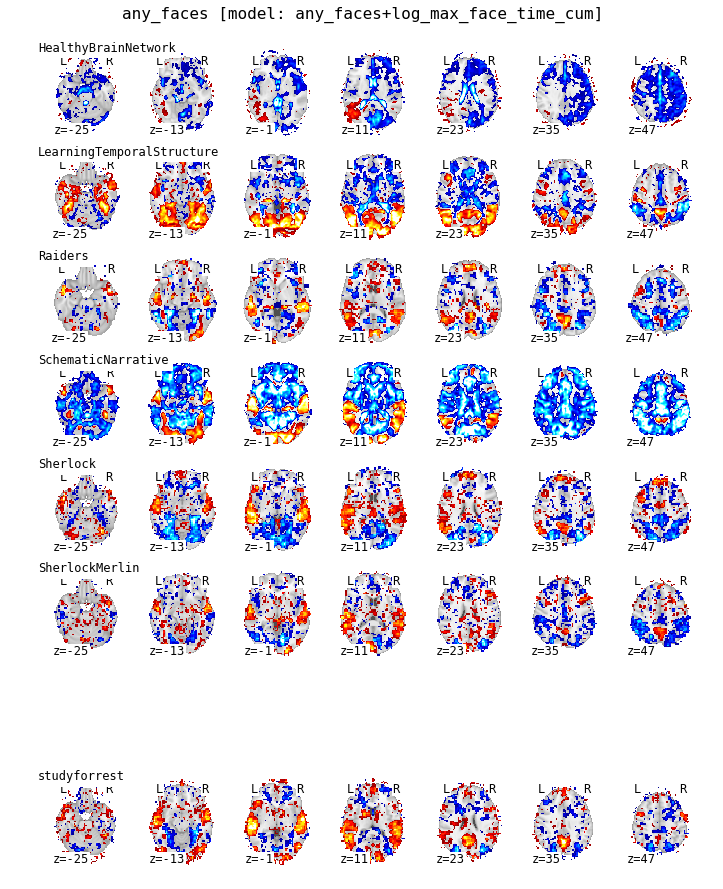

No image for SherlockMerlin


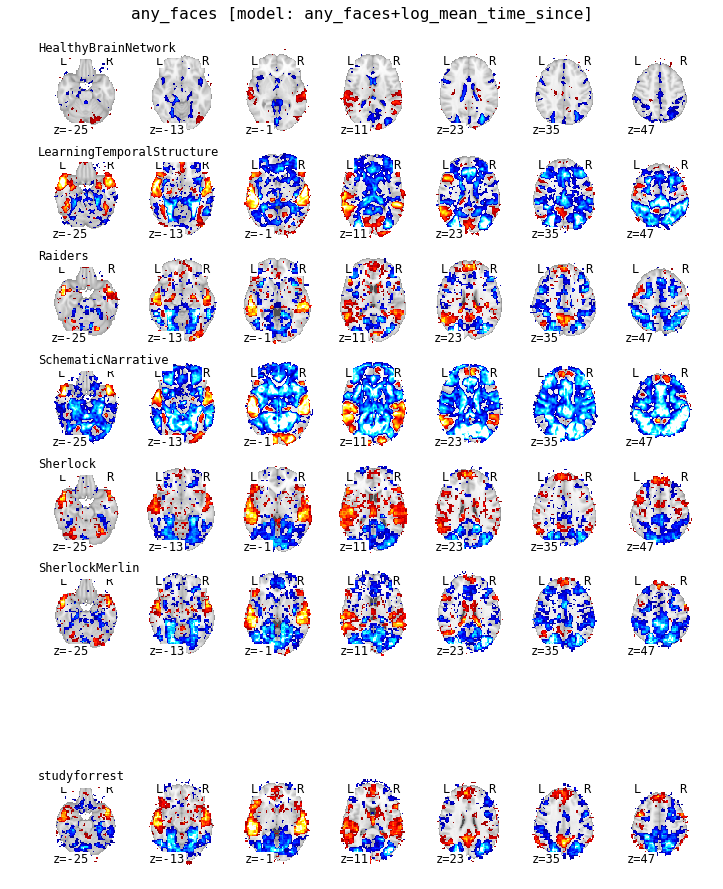

No image for SherlockMerlin


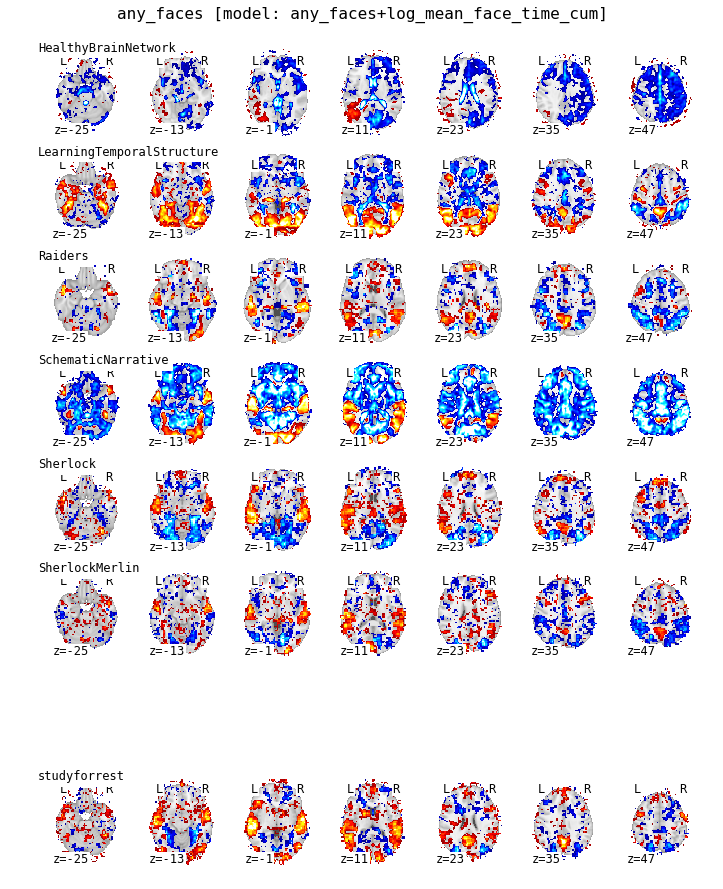

No image for SherlockMerlin


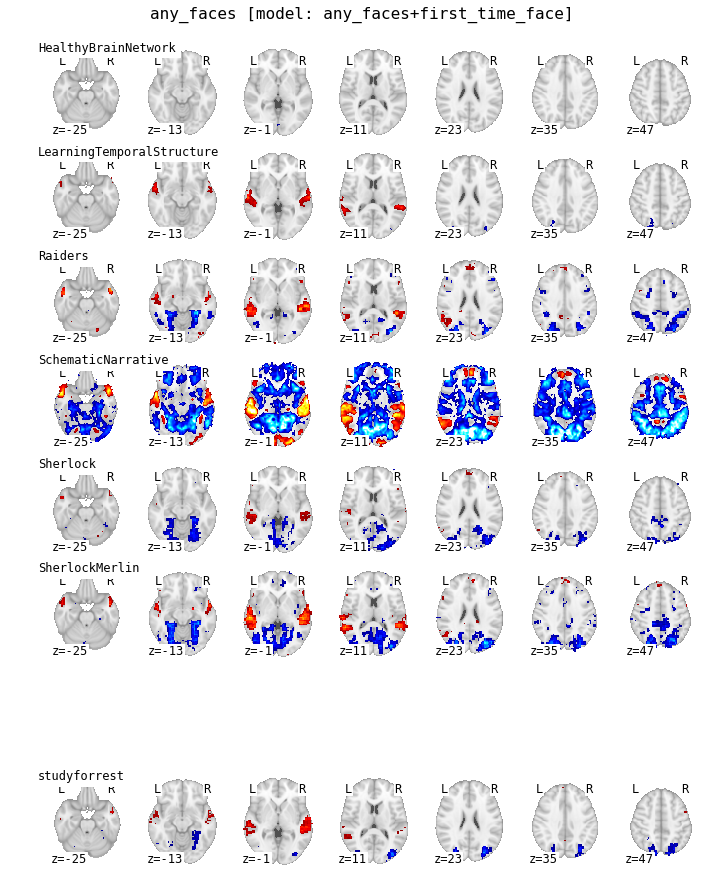

No image for SherlockMerlin


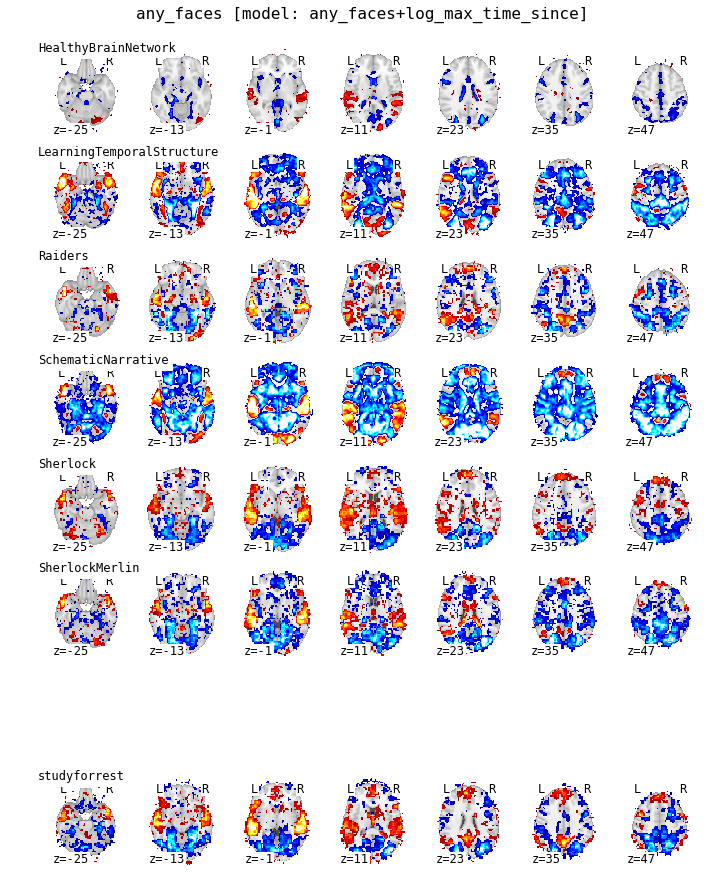

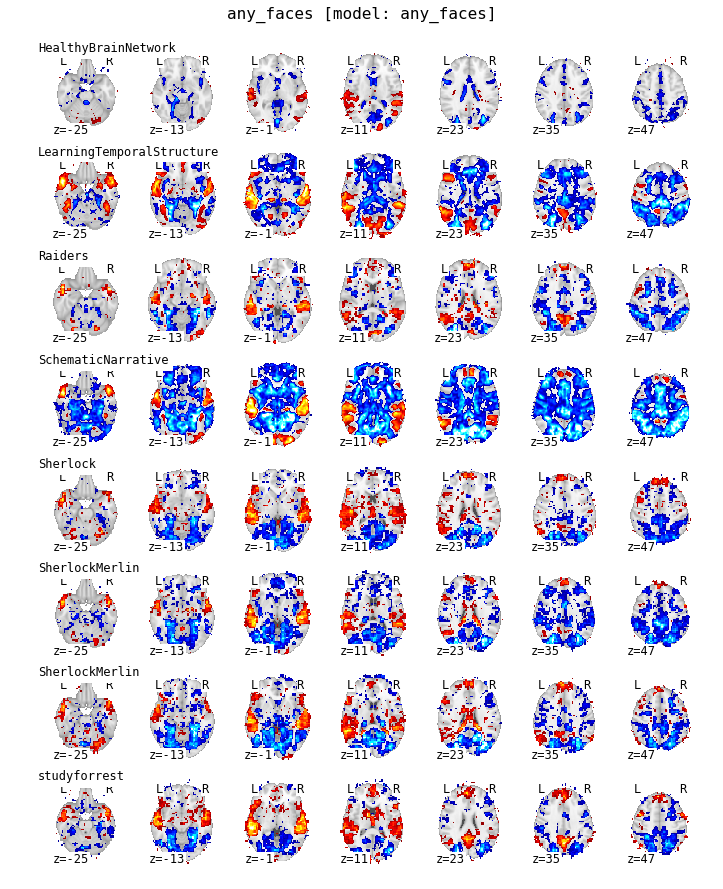

In [9]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models,
                         contrasts=['any_faces'],
                         vmax=10, display_mode='z', figsize=(12,15),
                         threshold=1.96, colorbar=False)

No image for SherlockMerlin


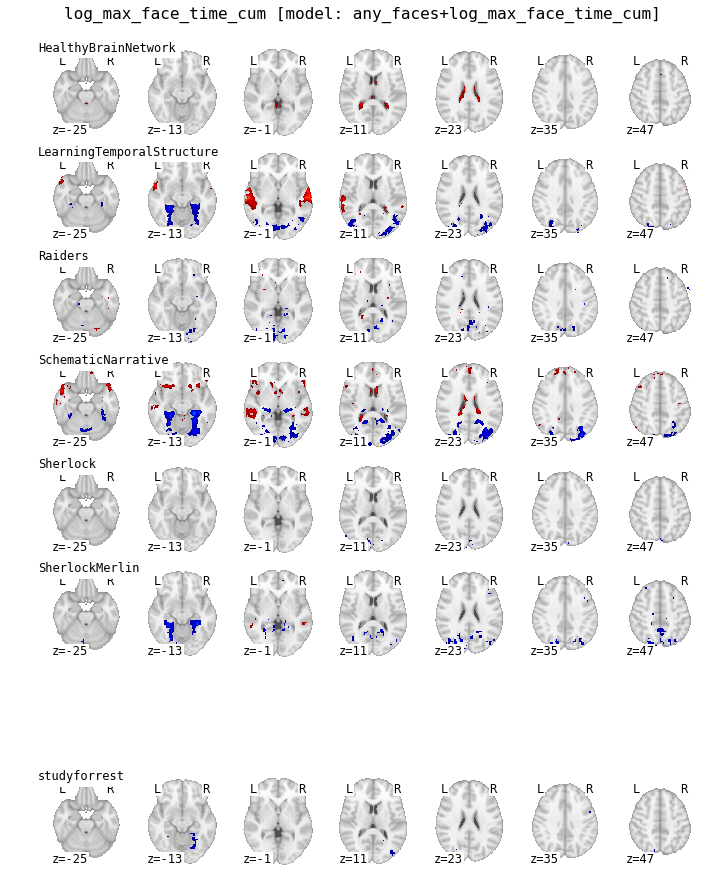

No image for SherlockMerlin


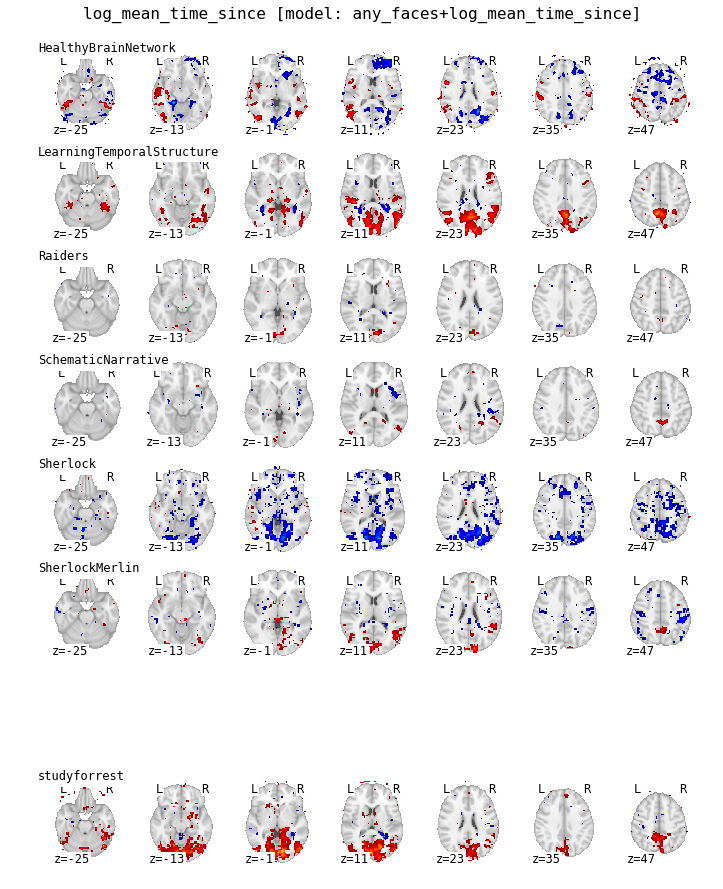

No image for SherlockMerlin


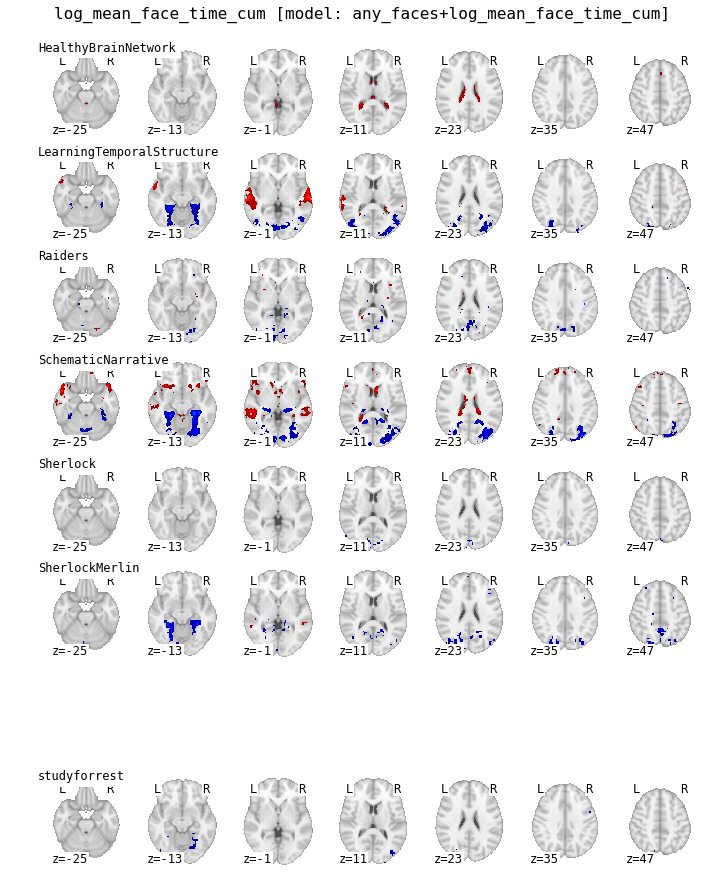

No image for SherlockMerlin


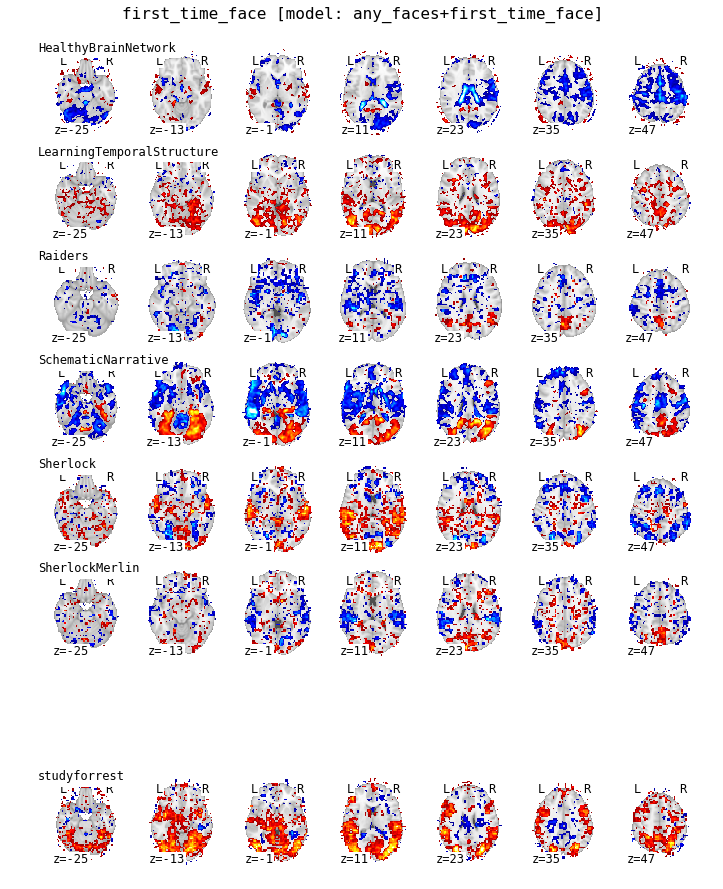

No image for SherlockMerlin


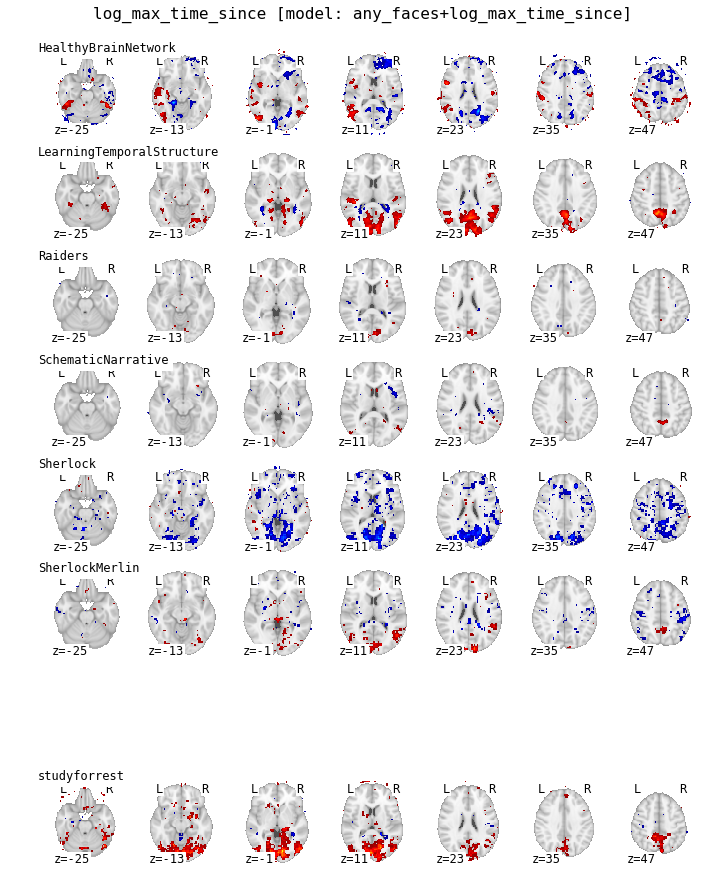

In [10]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models,
                         contrasts=other,
                         vmax=10, display_mode='z', figsize=(12,15),
                         threshold=1.96, colorbar=False)